<a href="https://colab.research.google.com/github/Samapti25/solar/blob/main/carringtonmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [ ]:
!git clone https://github.com/Samapti25/solar.git


fatal: destination path 'solar' already exists and is not an empty directory.


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
!pip install astropy


In [ ]:
!pip install drms

In [ ]:
!pip install aiapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install sunpy[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.2/962.2 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 k

In [4]:
import os
from astropy.io import fits
import sunpy.map
from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit





In [5]:
folder_path = "/content/drive/MyDrive/data folder"
save_dir1="/content/drive/MyDrive/data folder/South hemisphere"
save_dir2= "/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
print(fits_files)

['/content/drive/MyDrive/data folder/synop_Mr_0.1960.fits']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data
    #print(header)
    #print(data)

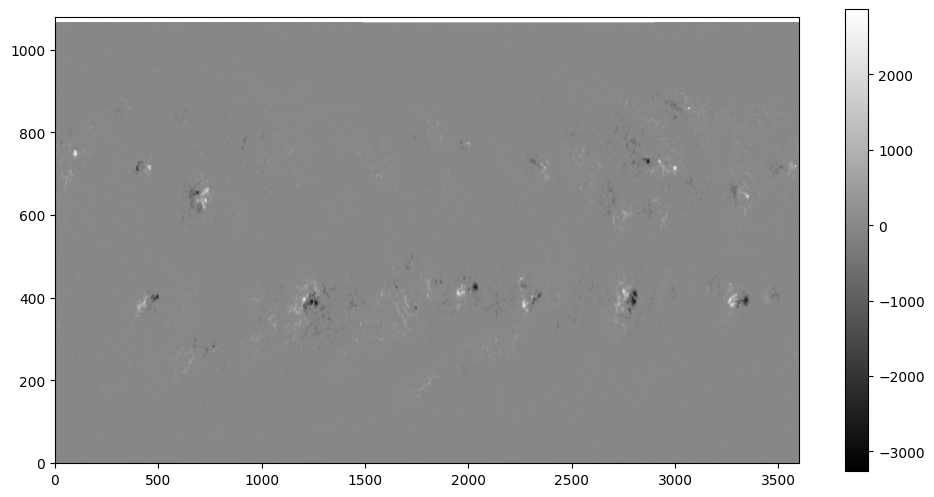

In [7]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=2)
plt.colorbar()

In [8]:
nx=data.shape[1]
ny=data.shape[0]
longitude=np.linspace(0,360,nx)
sin_lat=np.linspace(-1,1,ny)



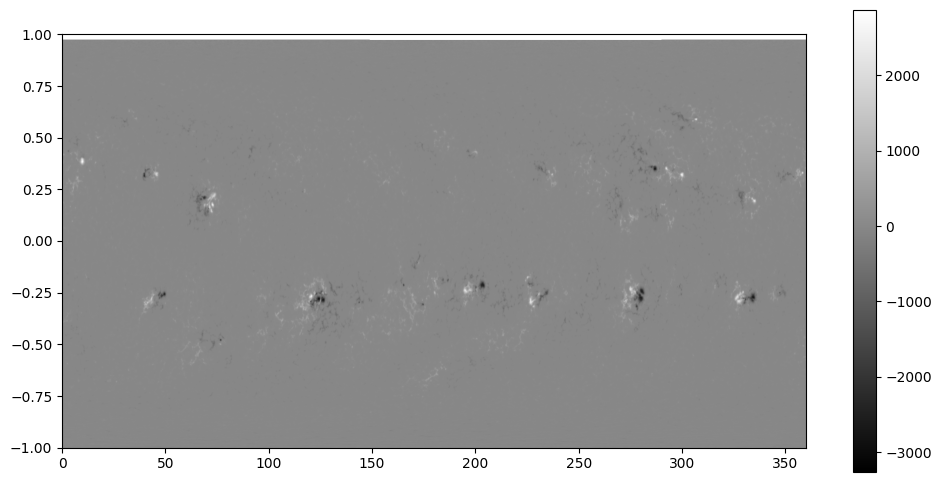

In [9]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect=100)
plt.colorbar()

In [10]:
latitude=[]
longitude=[]
sinlat=[]
flux=[]
R_sun = 6.96e10


print(ny)
for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))

  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  latitude.append(Latitude)
  sinlat.append(sin_lat)

for j in range(nx):
  Longitude = 0+j*(360/(nx-1))
  longitude.append(Longitude)
      #B=data[i,j]
#Phi= (data)*(R_sun**2)*(d_lon)*(d_sinlat)
#phi1 = (R_sun**2)*(d_lon)*(d_sinlat)
#print(phi1)











1080


In [11]:
lon=np.array(longitude)
lat=np.array(latitude)
sinlat=np.array(sinlat)

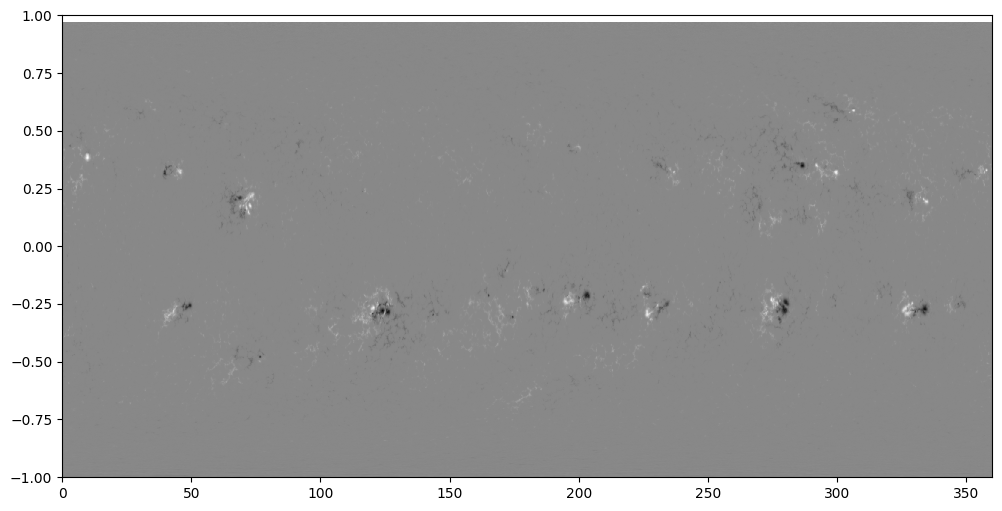

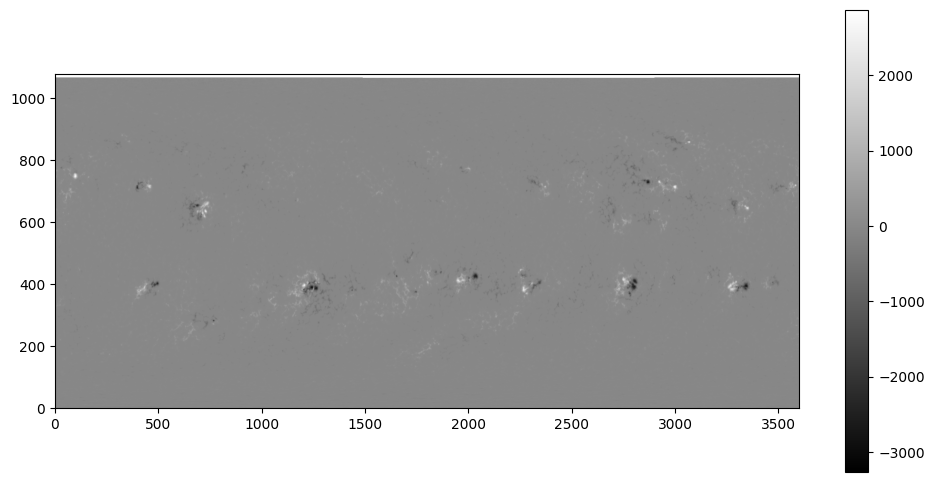

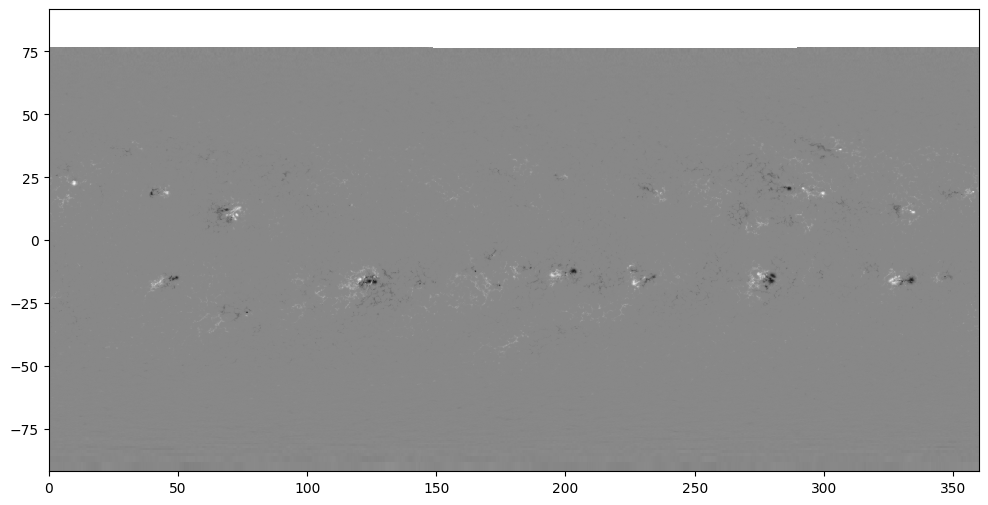

In [12]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,data, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(data,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,data, cmap='gray')


In [13]:
mask=(lat >=-65) & (lat<=65)
crop_data= data[mask, :]
crop_lat=lat[mask]

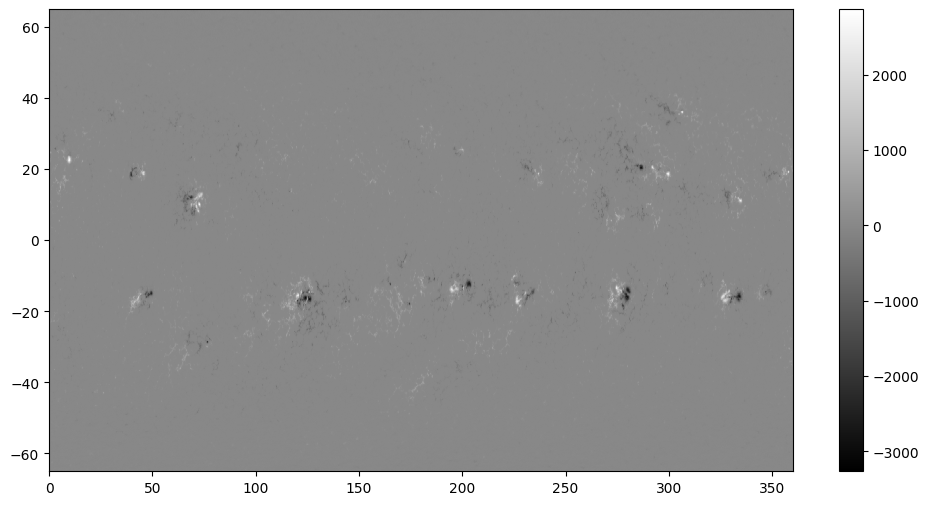

In [14]:
fig=plt.figure(figsize=(12,6))
Lon,Lat=np.meshgrid(lon, crop_lat )
plt.pcolormesh(Lon,Lat,crop_data, cmap='gray')
plt.colorbar()

In [15]:

threshold=100
binary_mask=np.abs(data)>threshold
mask=(np.abs(data)>threshold)                                    #|(np.abs(data)==0)
crop_data=np.where(mask, data, 0)


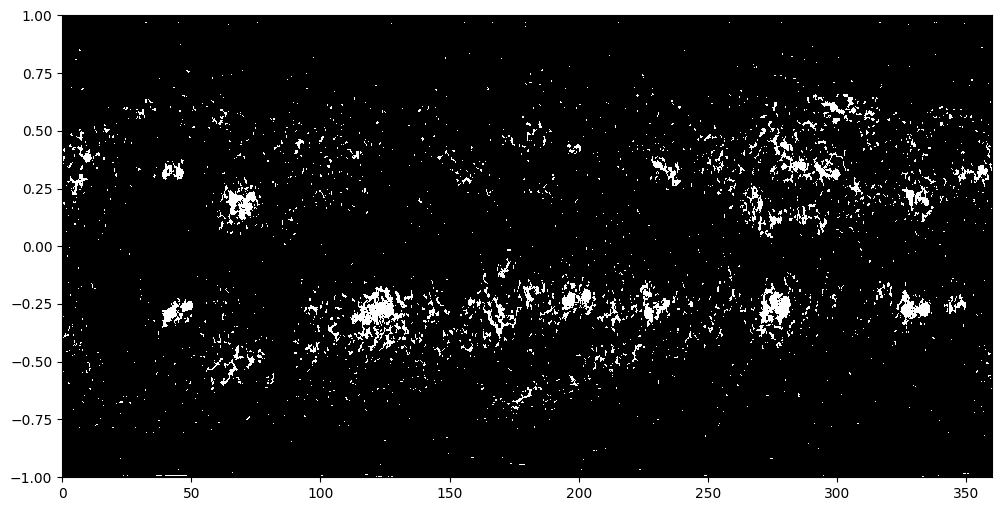

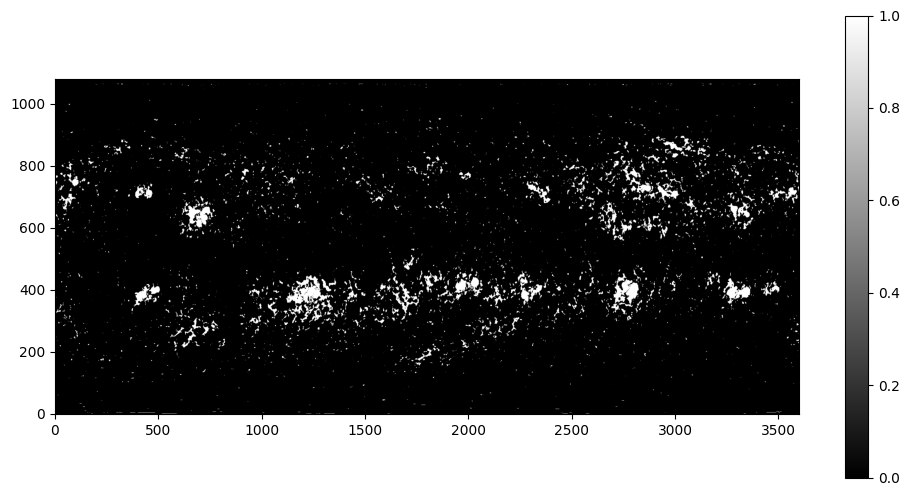

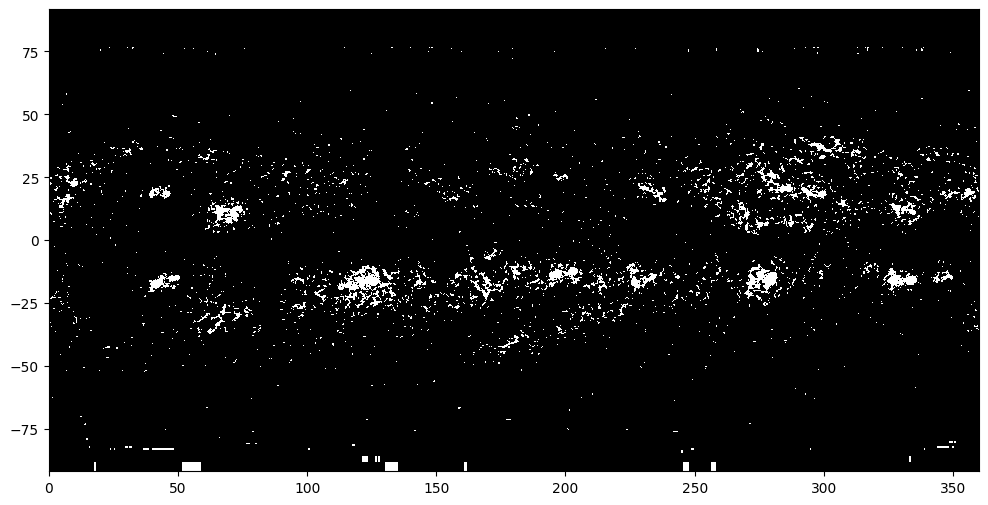

In [16]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(binary_mask,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,binary_mask, cmap='gray')

In [17]:
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))


In [18]:
areathres=700
mask_filtered = np.zeros_like(binary_mask)



In [19]:
for i, size in enumerate(sizes):
  if size >=areathres:
    mask_filtered[labeled_array == (i + 1)] = 1


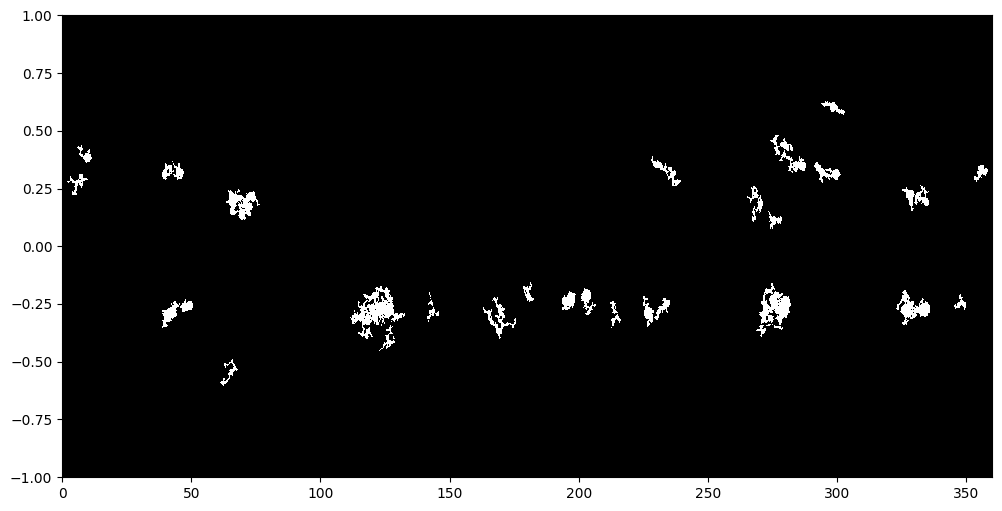

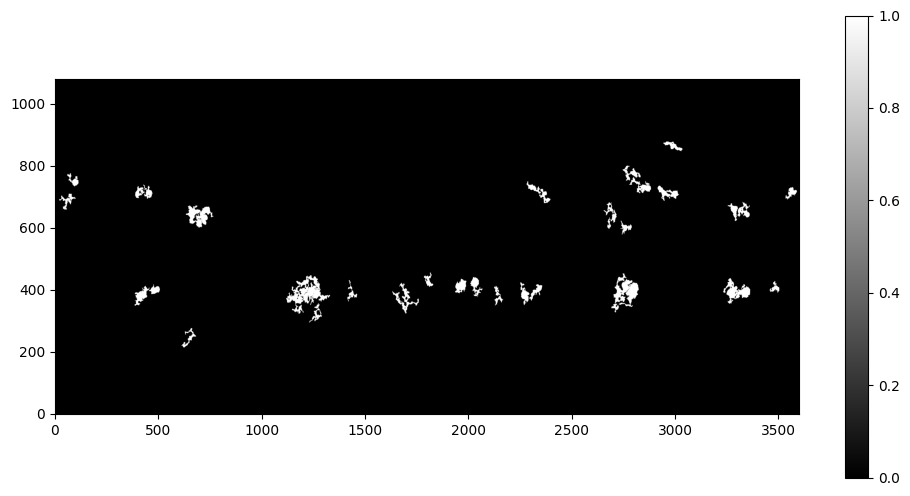

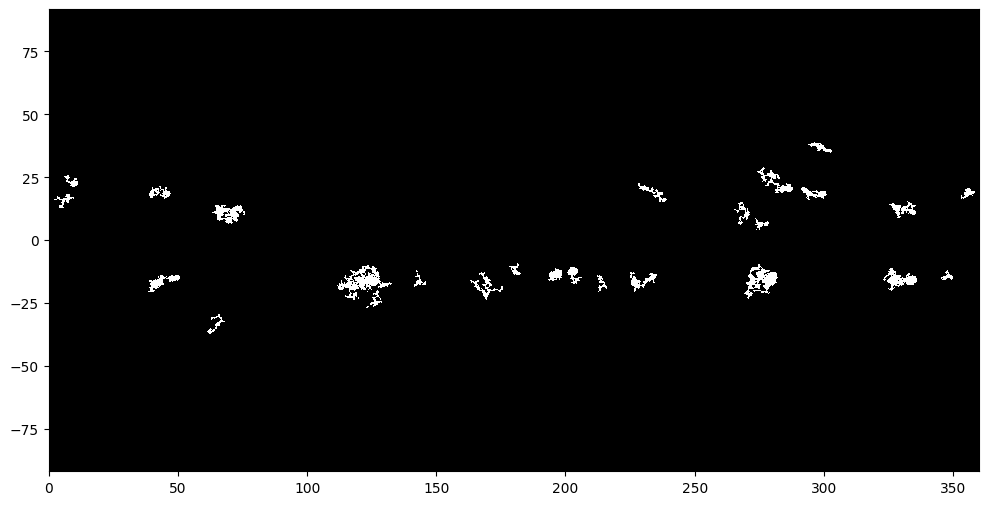

In [20]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,mask_filtered, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(mask_filtered,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,mask_filtered, cmap='gray')

In [34]:

longitude=[]
sinlat=[]
latitude=[]
colatitude =[]
sincolatitude=[]
flux=[]
flux_rad =[]
R_sun = 6.96e10



for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  d_sinlat=2/(ny-1)
  d_theta=np.arcsin(d_sinlat)*(180/np.pi)

  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  colat=90-(Latitude)
  colat_rad = (colat*np.pi)/180

  latitude.append(Latitude)
  sinlat.append(sin_lat)
  colatitude.append(colat)

  for j in range(nx):
    Longitude = 0+j*(360/(nx-1))
    d_lon=360/(nx-1)

    longitude.append(Longitude)
  b= data[i]
  #phi=(b)*np.sin(colat)*(R_sun**2)*(d_theta)*(d_lon)
  phi_rad=(b)*np.sin(colat_rad)*(R_sun**2)*(d_theta)*(d_lon)
  #flux.append(phi)
  flux_rad.append(phi_rad)

#print(flux)

#print(longitude)

#print(latitude)
#print(colatitude)

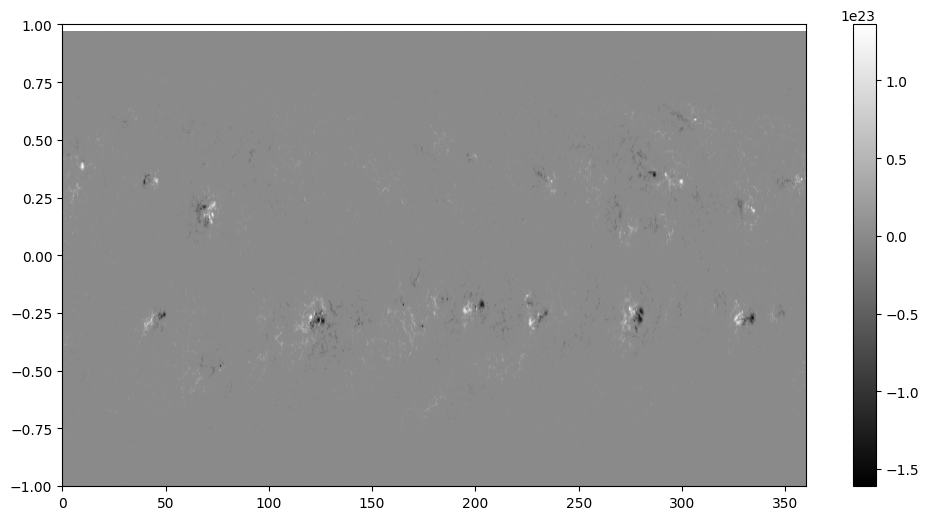

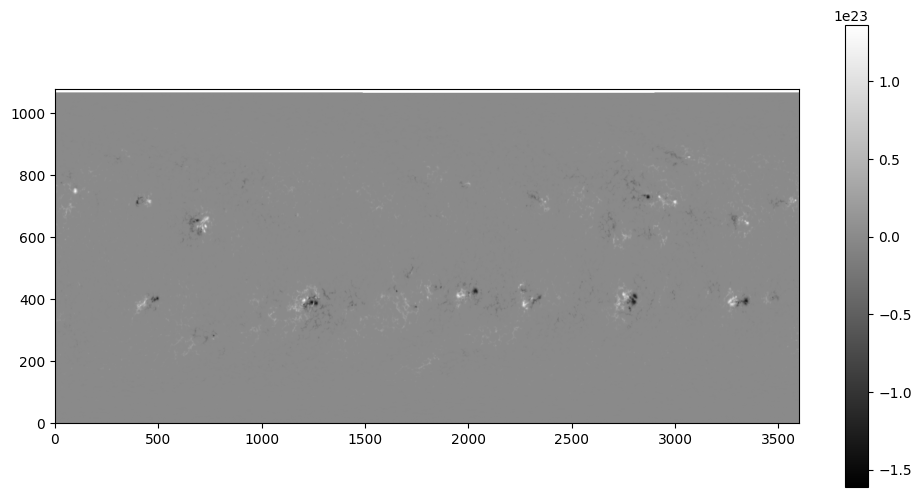

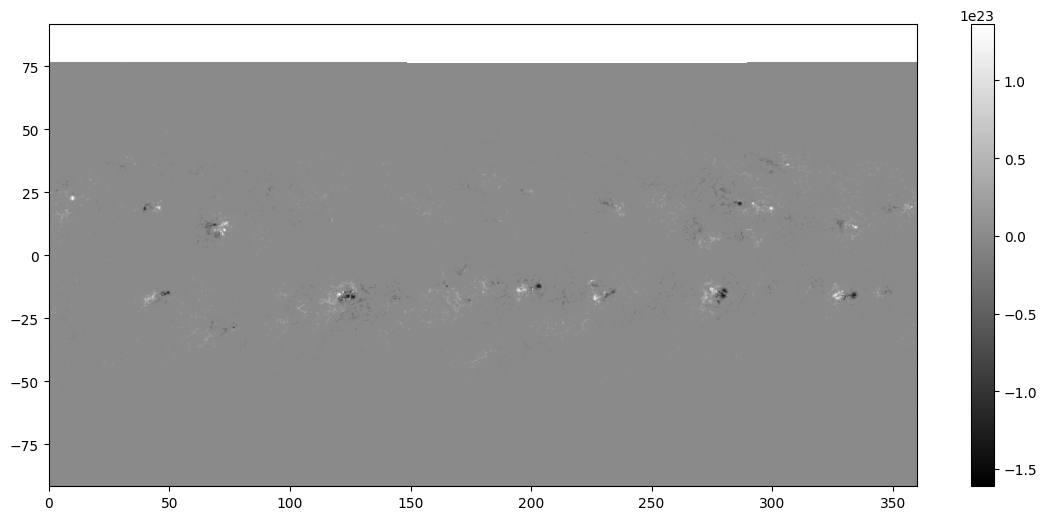

In [36]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,flux_rad, cmap='gray')
plt.colorbar()

fig=plt.figure(figsize=(12,6))
plt.imshow(flux_rad,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(14,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,flux_rad, cmap='gray')
plt.colorbar()




In [37]:
fluxthres=1e22

#binary_mask=np.abs(flux)>fluxthres
binary_mask2=np.abs(flux_rad)>fluxthres



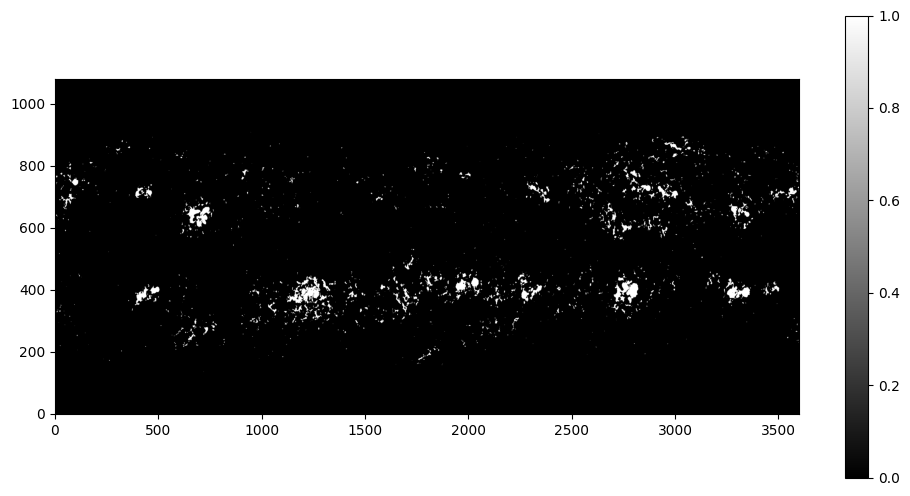

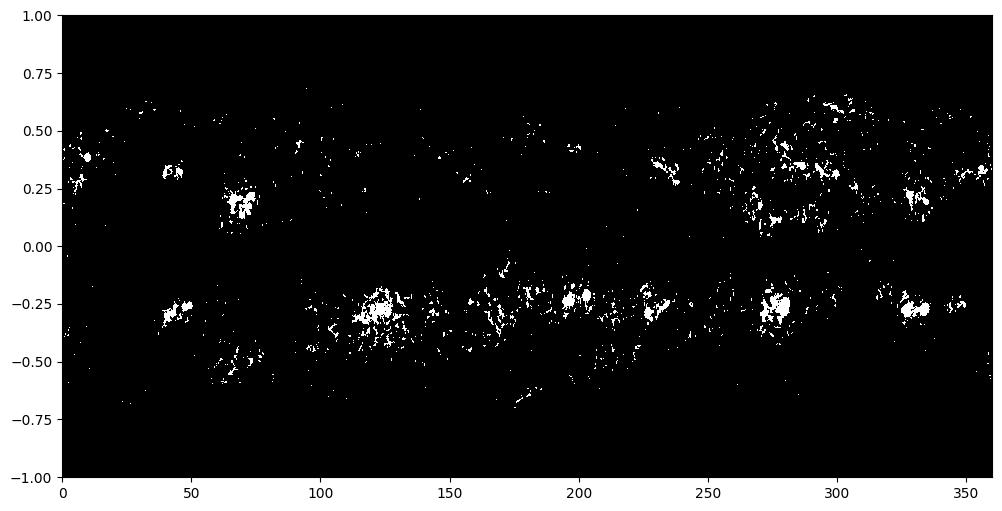

In [38]:

fig=plt.figure(figsize=(12,6))
plt.imshow(binary_mask2,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()

fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask2, cmap='gray')





In [39]:
lon=np.array(longitude)
lat=np.array(latitude)
sinlat=np.array(sinlat)

In [40]:
y_indices, x_indices = np.where(binary_mask2==1)

Lat=lat[y_indices]
Lon=lon[x_indices]
mask1=(Lat<=0)& (Lat>=-90)
SH_lat=Lat[mask1]
SH_lon=Lon[mask1]
mask2= (Lat<=90) & (Lat>=0)
NH_lat = Lat[mask2]
NH_lon = Lon[mask2]

sorted_indices1= np.argsort(SH_lon)
SHlon_sorted=SH_lon[sorted_indices1]
SHlat_sorted=SH_lat[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
#print(output1)
sorted_indices2 = np.argsort(NH_lon)
NHlon_sorted= NH_lon[sorted_indices2]
NHlat_sorted = NH_lat[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
#print(output2)



In [41]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

In [ ]:
folder_path2="/content/drive/MyDrive/data folder/South hemisphere"
files = os.listdir(folder_path2)
txt_files = glob.glob(os.path.join(folder_path2, '*.txt'))
Y=[]
X=[]
Z=[]
for file in txt_files:
	print(file)


/content/drive/MyDrive/data folder/South hemisphere/ synop_Mr_0.1960_SH.txt


In [ ]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      lon=float(parts[0])
      lat=float(parts[1])
      lon_rad = (lon*np.pi)/180
      y=-0.25+0.02*np.sin(lon_rad)
      Y.append(y)
      X.append(lon)
      Z.append(lat)


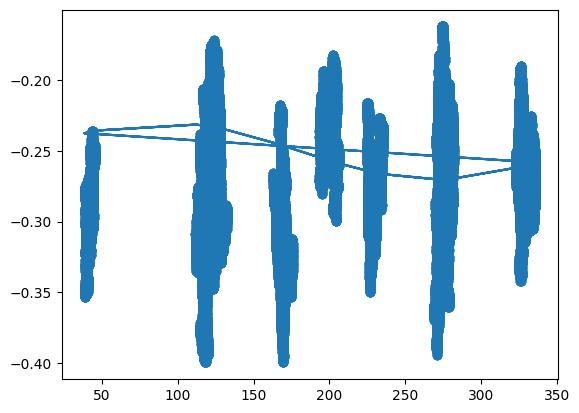

In [ ]:
plt.scatter(X,Z)
plt.plot(X,Y)

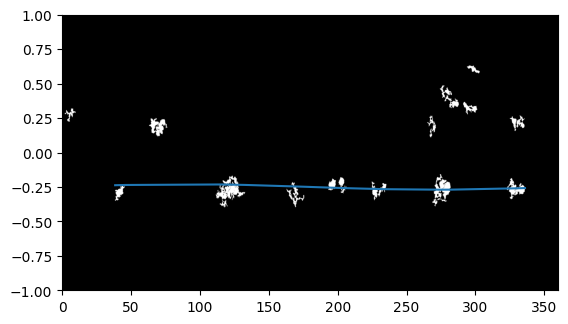

In [ ]:

plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect=100)
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(X,Y)





In [ ]:
folder_path3="/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]
C=[]
for file in txt_files:
	print(file)

/content/drive/MyDrive/data folder/North hemisphere/ synop_Mr_0.1960_NH.txt


In [ ]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      lon=float(parts[0])
      lat=float(parts[1])
      lon_rad = (lon*np.pi)/180
      def model(lon_rad,a,b,c):
        return a+b*np.sin(lon_rad+c)
      params,_ = curve_fit(model,lon_rad,lat)
      print(f"a = {params[0]}, b = {params[1]}, c={params[2]}")


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

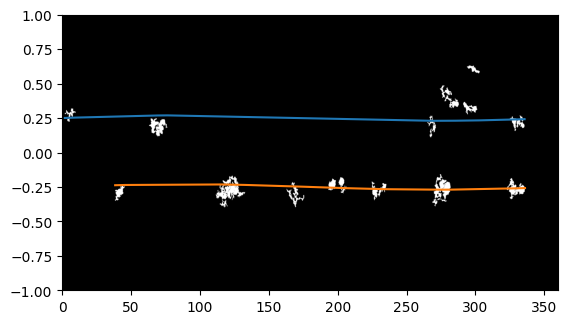

In [ ]:
plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect=100)
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(A,B)
plt.plot(X,Y)

In [ ]:
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=0.25+np.sin(X)

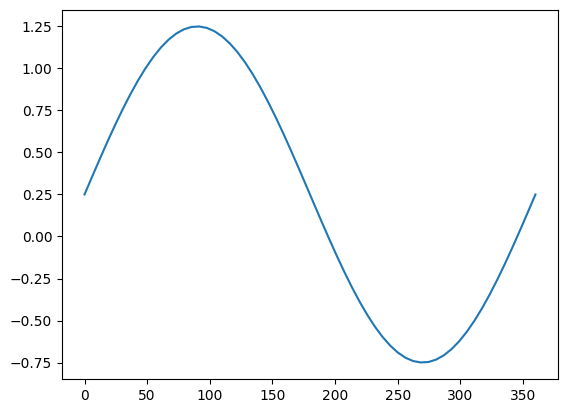

In [ ]:
plt.plot(x,y)

[[ 1.27103014e-34 -7.25688357e-33]
 [-7.25688357e-33  9.26810296e-31]]
[1.12739973e-17 9.62709871e-16]
slope = 1.0, Interceptt = 57.29577951308232


ValueError: x and y must be the same size

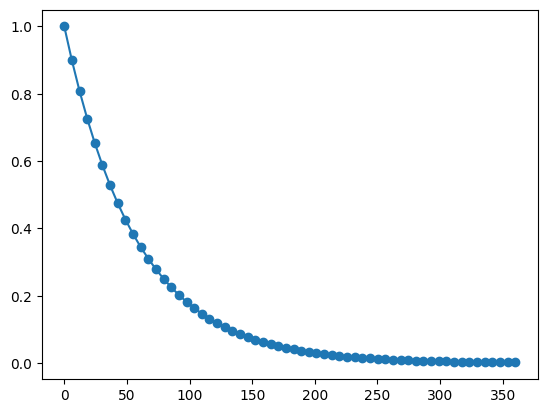

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=np.exp(-X)
plt.scatter(x,y)
def model(x,a,b):
  return a*np.exp(-(x/b))
params,cov = curve_fit(model,x,y)
print(cov)
error=np.sqrt(np.diag(cov))
print(error)
print(f"slope = {params[0]}, Interceptt = {params[1]}")
plt.plot(x,y)
plt.scatter(x,error)


100


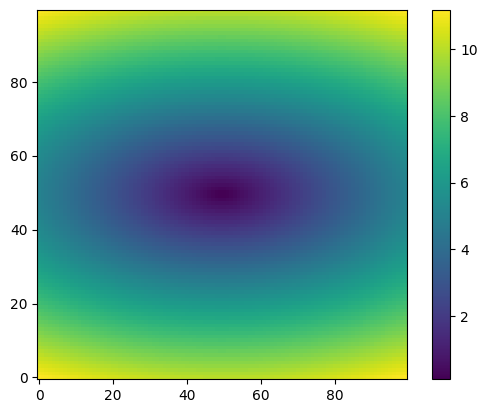

In [ ]:
x=np.linspace(-5,5,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)

Z=np.sqrt(X**2+Y**2)
plt.imshow(Z,origin="lower")
plt.colorbar()
nx=Z.shape[0]
ny=Z.shape[1]
print(nx)




In [ ]:
threshold= 6
mask=(np.abs(Z)>threshold)                                    #|(np.abs(data)==0)
z=np.where(mask, Z, 0)

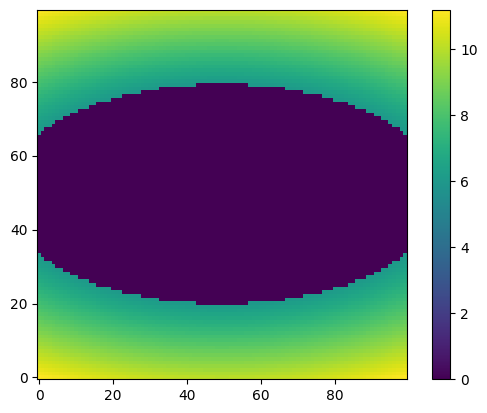

In [ ]:
plt.imshow(z,origin="lower")
plt.colorbar()

In [ ]:
sinlat=[]
latitude=[]
longitude=[]
for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  Lat=np.arcsin(sin_lat)*(180/np.pi)
  latitude.append(Lat)
  print(f"{i}  {sin_lat} {Lat}")


  sinlat.append(sin_lat)

  for j in range(nx):
    Longitude = -5+j*(10/(nx-1))

    if i == 0:
      longitude.append(Longitude)

0  -1.0 -90.0
1  -0.9797979797979798 -78.46363762762356
2  -0.9595959595959596 -73.65732088684179
3  -0.9393939393939394 -69.95002427584853
4  -0.9191919191919192 -66.80823048997212
5  -0.898989898989899 -64.02560998217861
6  -0.8787878787878788 -61.49648988291987
7  -0.8585858585858586 -59.158172045053405
8  -0.8383838383838383 -56.969848395363314
9  -0.8181818181818181 -54.9031987724154
10  -0.797979797979798 -52.93761800807308
11  -0.7777777777777778 -51.057558731018624
12  -0.7575757575757576 -49.25094562252961
13  -0.7373737373737373 -47.50817622207699
14  -0.7171717171717171 -45.82146314535847
15  -0.696969696969697 -44.184385153304454
16  -0.6767676767676767 -42.59157134639634
17  -0.6565656565656566 -41.038473207637686
18  -0.6363636363636364 -39.52119635864218
19  -0.6161616161616161 -38.03637395712358
20  -0.5959595959595959 -36.581069790258596
21  -0.5757575757575757 -35.15270296678003
22  -0.5555555555555556 -33.74898859588859
23  -0.5353535353535352 -32.36789048575854
24  

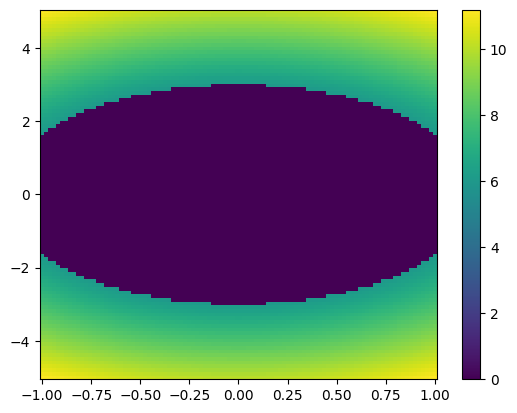

In [ ]:
X,Y=np.meshgrid(sinlat,longitude,)
plt.pcolormesh(X,Y,z)
plt.colorbar()


<ipython-input-43-4eeb0b7ef7c4>:11: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(lon,lat,z, origin="lower", aspect=1.5, cmap="gray")


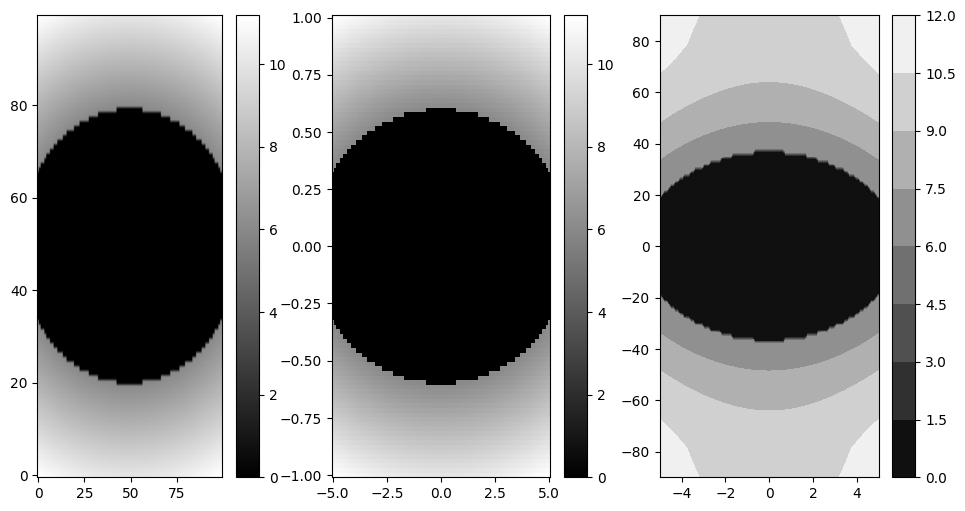

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(z, origin="lower",aspect=2.5, cmap="gray")
plt.colorbar()
plt.subplot(1,3,2)
X,Y=np.meshgrid(longitude, sinlat)
plt.pcolormesh(X,Y,z, cmap="gray")
plt.colorbar()
plt.subplot(1,3,3)
lon, lat=np.meshgrid(longitude, latitude)
plt.contourf(lon,lat,z, origin="lower", aspect=1.5, cmap="gray")
plt.colorbar()

In [ ]:
A=[1,2,3,4]
B=[2,4,6,8]
c=(A)*2
print(c)

[1, 2, 3, 4, 1, 2, 3, 4]


In [33]:
print(np.sin(90))
a=(90*np.pi)/180
print(a)
print(np.sin(a))

0.8939966636005579
1.5707963267948966
1.0
